In [1]:
# import all necessary libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A simple function to display the image using matplotlib
def show(img, cmap = None, figsize = (7, 7)):
    plt.figure(figsize = figsize)
    if cmap is not None:
        plt.imshow(img, cmap = cmap), plt.axis('off')
    else:
        plt.imshow(img), plt.axis('off')

# Image Gradient

- Image gradients is the the method to find edges and corners in the image
- OpenCV provides three types of gradient filters namely **Sobel**, **Scharr** and **Laplacian**

>To read more about the mathematics, refer __[link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html)__

## Laplacian Derivatives


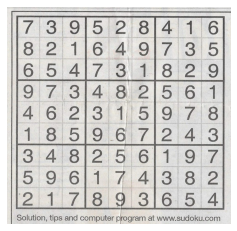

In [33]:
# Load Image
image = cv2.imread("data/sudoku.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(image[:, :, ::-1], figsize = (4, 4))


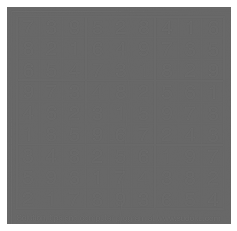

In [34]:
# Apply laplacian and find gradient along x and y direction
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
show(laplacian, cmap = "gray", figsize = (4, 4))

<div class="alert alert-block alert-info">
<b>Tip:</b> Gradient did not work as image is high resolution image with lot of noise. <br>
    So, remove the noise using Gaussian blur. (Try with multiple kernel sizes) and then try Laplacian
</div>

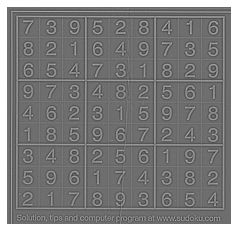

In [35]:
# Blur the image
blur = cv2.GaussianBlur(gray, (13, 13), 0)

# Apply laplacian and find gradient along x and y direction
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
show(laplacian, cmap = "gray", figsize = (4, 4))

## Sobel and Scharr Derivatives

- Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. 
- You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, `yorder` and `xorder` respectively). 
- You can also specify the size of kernel by the argument ksize. 


<div class="alert alert-block alert-info">
<b>Note:</b> If ksize = -1, a 3x3 <b>Scharr filter</b> is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.
</div>




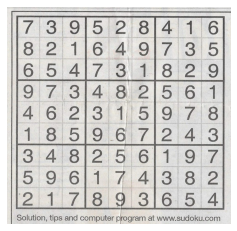

In [27]:
# Load Image
image = cv2.imread("data/sudoku.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(image[:, :, ::-1], figsize = (4, 4))

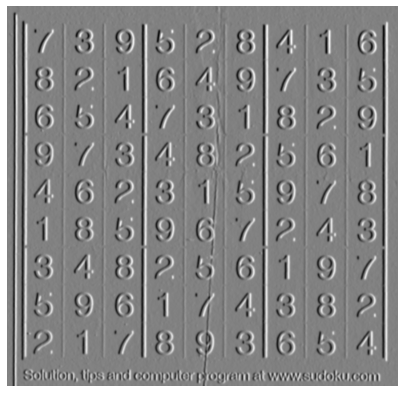

In [31]:
# Blur the image
blur = cv2.GaussianBlur(gray, (13, 13), 0)

# keep ksize = -1 to use Scharr Gradient
scharr = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=-1)
show(scharr, 'gray')

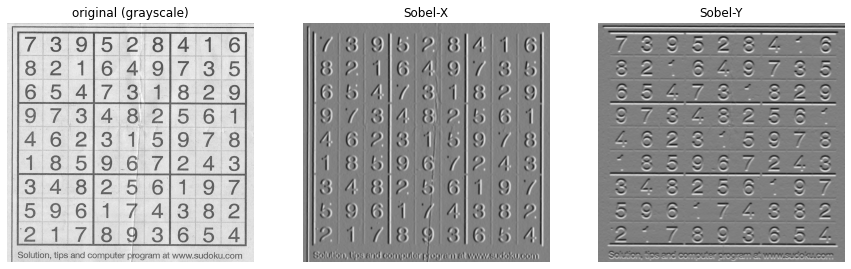

In [32]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)

# display heatmap as well as original image
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1), plt.imshow(gray, cmap = 'gray'), plt.axis('off'), plt.title("original (grayscale)");
plt.subplot(1, 3, 2), plt.imshow(sobelx, cmap = 'gray'), plt.axis('off'), plt.title("Sobel-X");
plt.subplot(1, 3, 3), plt.imshow(sobely, cmap = 'gray'), plt.axis('off'), plt.title("Sobel-Y");